In [22]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib ipympl

#%matplotlib inline

In [23]:
# A collection of tests for the NanoUPS.com power controller.
# Test 1 starts with a fully charged 12V 5AH LiFePO4 battery, runs on battery power until full discharge,
# then main power is applied and system monitored until the battery is fully charged.
# Test 2 starts with a fully charged 12V 5AH LiFePO4 battery, runs on 50% main, 50% battery power until full discharge.
# A load is used so the battery chage is a net negative over a power cycle.
# Test 3 starts with a fully discharged 12V 5AH LiFePO4 battery, runs on 50% main, 50% battery power until full charge.
# A light load is used so the battery chage is a net positive over a power cycle.
# Test 2 and 3 check nothing unexpected happens when switching on and off main power at almost all battery charge states.
# The power controller powers the Arduino recording the data, so no readings are taken at battery discharge.
# https://github.com/conciseusa/arduino-rtc-json-data-logger - Outputs time stamped data in JSON for recording to a serial logger.
# https://github.com/conciseusa/raspberry-pi-json-data-logger - Converts data to csv for use in this notebook.

In [13]:
#df = pd.read_csv('/home/walter/Work/data/2022-02-06-dataDCcycle.csv')
df = pd.read_csv('data/2023-07-12-dataNanoUPS-DCCycle.csv')  # read from data dir in checkout dir
df
df.Time

0       2023-7-10T22:44:13
1       2023-7-10T22:45:13
2       2023-7-10T22:46:14
3       2023-7-10T22:47:14
4       2023-7-10T22:48:14
               ...        
2484    2023-7-12T17:07:02
2485    2023-7-12T17:08:02
2486    2023-7-12T17:09:02
2487    2023-7-12T17:10:03
2488    2023-7-12T17:11:03
Name: Time, Length: 2489, dtype: object

In [14]:
print(df.head())

                 Time   A0  A0volt  A0tempF   A1  A1volt  A1tempF   A2  \
0  2023-7-10T22:44:13  154    0.75    77.48  509    2.48    389.8  509   
1  2023-7-10T22:45:13  153    0.75    76.60  509    2.48    389.8  509   
2  2023-7-10T22:46:14  153    0.75    76.60  509    2.48    389.8  509   
3  2023-7-10T22:47:14  153    0.75    76.60  509    2.48    389.8  472   
4  2023-7-10T22:48:14  153    0.75    76.60  509    2.48    389.8  471   

   A2volt  A2tempF  ...  D5  D6  D7  D8  D9  D10  D11  D12  D13  SerialNumber  
0    2.48   389.80  ...   1   0   1   1   1    1    1    1    1           NaN  
1    2.48   389.80  ...   1   0   1   1   1    1    1    1    1           NaN  
2    2.48   389.80  ...   1   0   1   1   1    1    1    1    1           NaN  
3    2.30   357.25  ...   1   0   1   1   1    1    1    1    1           NaN  
4    2.30   356.37  ...   1   0   1   1   1    1    1    1    1           NaN  

[5 rows x 34 columns]


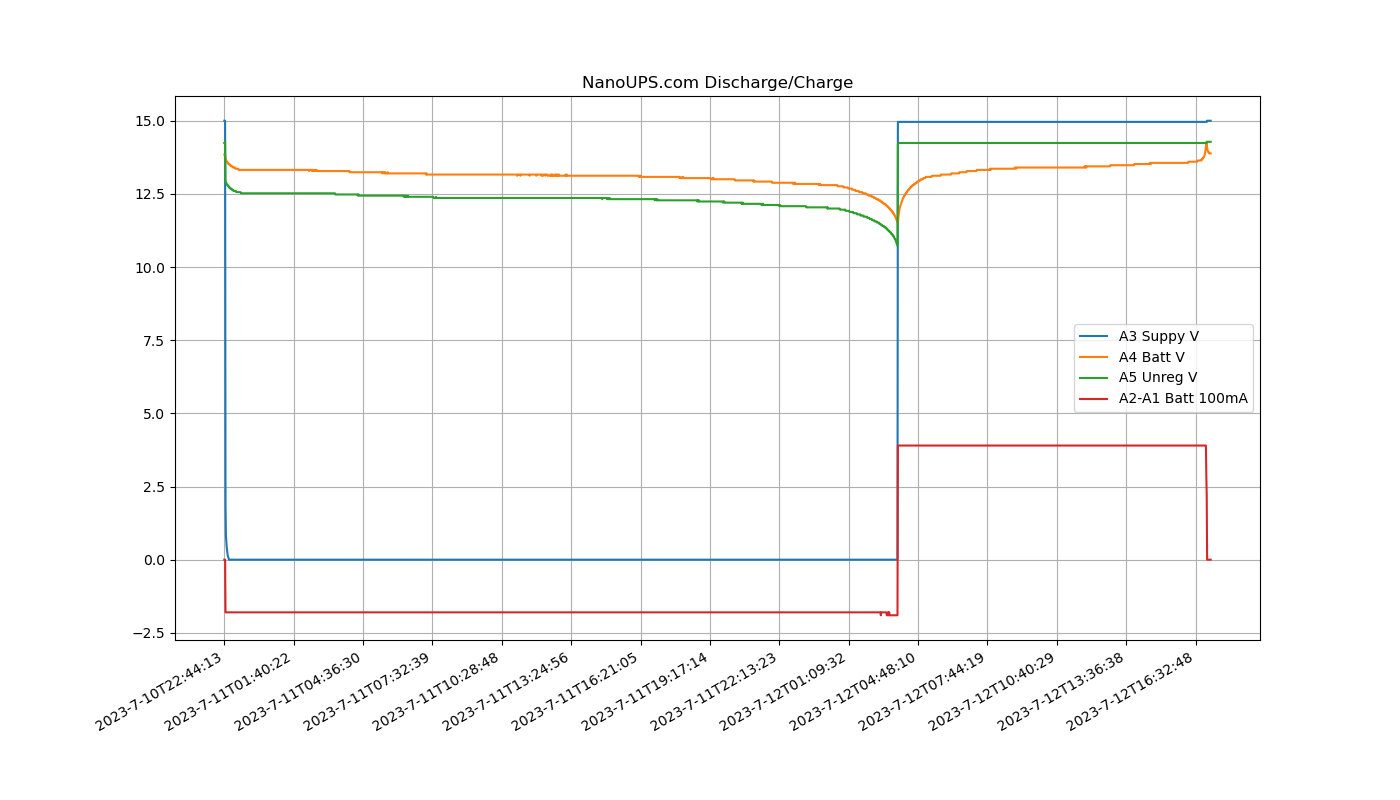

In [15]:
#plt.plot(df.Time, df.A3volt)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Suppy V')
ax.plot(df.Time, df.A4volt, label='A4 Batt V')
ax.plot(df.Time, df.A5volt, label='A5 Unreg V')
ax.plot(df.Time, (df.A2volt - df.A1volt) * 10, label='A2-A1 Batt 100mA') # A1 Vref, A2 current sense amp
ax.set_xticks(np.arange(0, len(df.Time)+1, 175))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS.com Discharge/Charge")
plt.show()

In [16]:
#df = pd.read_csv('/home/walter/Work/data/2022-02-06-dataDCcycle.csv')
df = pd.read_csv('data/2023-10-10-dataNanoUPS-50DCycleD.csv')  # read from data dir in checkout dir
df
df.Time

0       2023-10-10T17:51:51
1       2023-10-10T17:52:52
2       2023-10-10T17:53:52
3       2023-10-10T17:54:52
4       2023-10-10T17:55:53
               ...         
2161    2023-10-12T07:44:36
2162    2023-10-12T07:45:37
2163    2023-10-12T07:46:37
2164    2023-10-12T07:47:37
2165    2023-10-12T07:48:38
Name: Time, Length: 2166, dtype: object

In [17]:
print(df.head())

                  Time   A0  A0volt  A0tempF   A1  A1volt  A1tempF   A2  \
0  2023-10-10T17:51:51  152    0.74    75.72  509    2.48    389.8  509   
1  2023-10-10T17:52:52  152    0.74    75.72  509    2.48    389.8  509   
2  2023-10-10T17:53:52  152    0.74    75.72  509    2.48    389.8  509   
3  2023-10-10T17:54:52  152    0.74    75.72  509    2.48    389.8  509   
4  2023-10-10T17:55:53  151    0.74    74.84  509    2.48    389.8  509   

   A2volt  A2tempF  ...  D5  D6  D7  D8  D9  D10  D11  D12  D13  \
0    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
1    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
2    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
3    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
4    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   

                       SerialNumber  
0  2251441C44100820F80BA000A0000057  
1  2251441C44100820F80BA000A0000057  
2  2251441C44100820F80BA000A0000

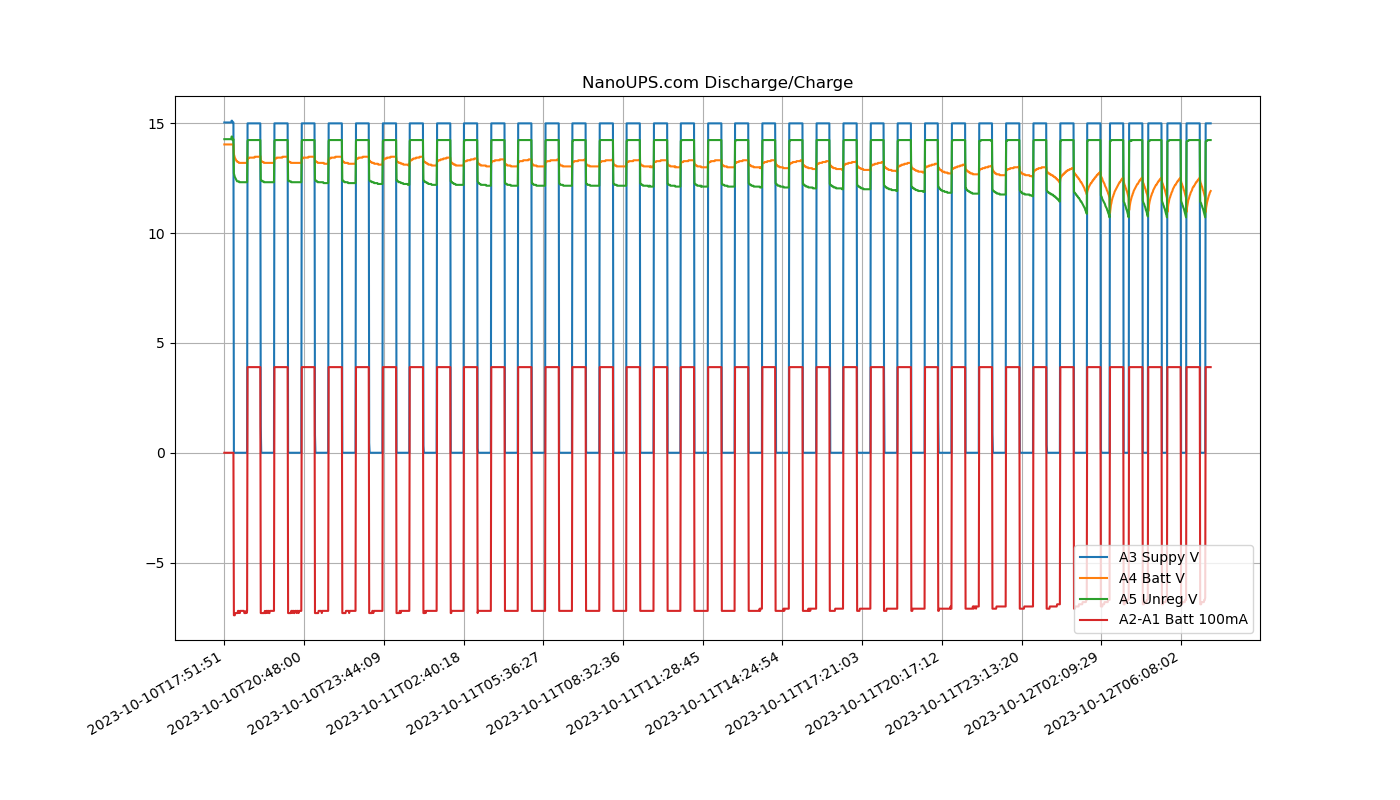

In [18]:
#plt.plot(df.Time, df.A3volt)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Suppy V')
ax.plot(df.Time, df.A4volt, label='A4 Batt V')
ax.plot(df.Time, df.A5volt, label='A5 Unreg V')
ax.plot(df.Time, (df.A2volt - df.A1volt) * 10, label='A2-A1 Batt 100mA') # A1 Vref, A2 current sense amp
ax.set_xticks(np.arange(0, len(df.Time)+1, 175))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS.com Discharge/Charge")
plt.show()

In [19]:
#df = pd.read_csv('/home/walter/Work/data/2022-02-06-dataDCcycle.csv')
df = pd.read_csv('data/2023-10-10-dataNanoUPS-50DCycleC.csv')  # read from data dir in checkout dir
df
df.Time

0       2023-10-12T07:49:38
1       2023-10-12T07:50:39
2       2023-10-12T07:51:39
3       2023-10-12T07:52:39
4       2023-10-12T07:53:40
               ...         
3403    2023-10-14T16:54:56
3404    2023-10-14T16:55:57
3405    2023-10-14T16:56:57
3406    2023-10-14T16:57:57
3407    2023-10-14T16:58:58
Name: Time, Length: 3408, dtype: object

In [20]:
print(df.head())

                  Time   A0  A0volt  A0tempF   A1  A1volt  A1tempF   A2  \
0  2023-10-12T07:49:38  146    0.71    70.45  508    2.48   388.92  588   
1  2023-10-12T07:50:39  146    0.71    70.45  508    2.48   388.92  589   
2  2023-10-12T07:51:39  147    0.72    71.33  509    2.48   389.80  588   
3  2023-10-12T07:52:39  146    0.71    70.45  509    2.48   389.80  588   
4  2023-10-12T07:53:40  147    0.72    71.33  509    2.48   389.80  588   

   A2volt  A2tempF  ...  D5  D6  D7  D8  D9  D10  D11  D12  D13  \
0    2.87   459.30  ...   1   0   1   1   1    1    1    1    1   
1    2.87   460.18  ...   1   0   1   1   1    1    1    1    1   
2    2.87   459.30  ...   1   0   1   1   1    1    1    1    1   
3    2.87   459.30  ...   1   0   1   1   1    1    1    1    1   
4    2.87   459.30  ...   1   0   1   1   1    1    1    1    1   

                       SerialNumber  
0  2251441C44100820F80BA000A0000057  
1  2251441C44100820F80BA000A0000057  
2  2251441C44100820F80BA000A0000

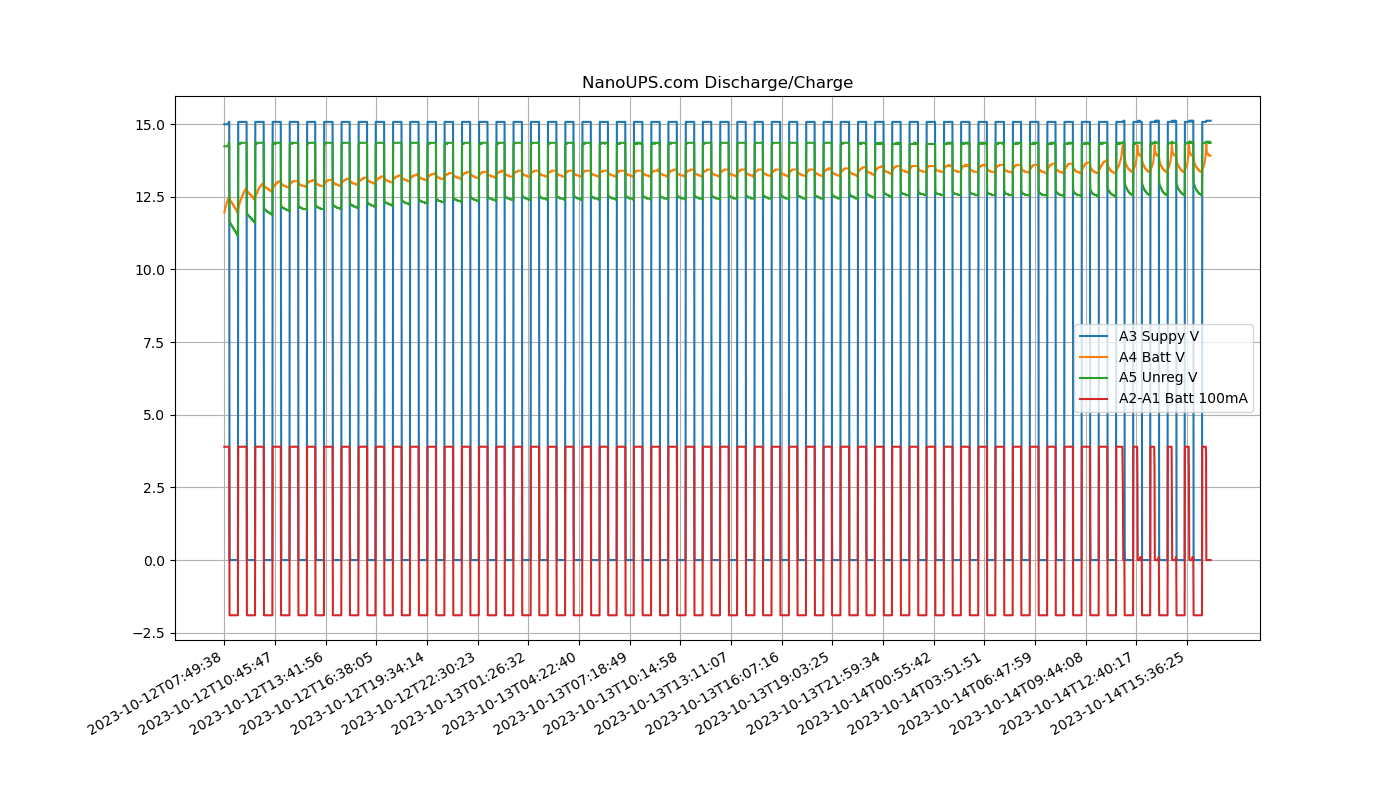

In [21]:
#plt.plot(df.Time, df.A3volt)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Suppy V')
ax.plot(df.Time, df.A4volt, label='A4 Batt V')
ax.plot(df.Time, df.A5volt, label='A5 Unreg V')
ax.plot(df.Time, (df.A2volt - df.A1volt) * 10, label='A2-A1 Batt 100mA') # A1 Vref, A2 current sense amp
ax.set_xticks(np.arange(0, len(df.Time)+1, 175))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS.com Discharge/Charge")
plt.show()